In [1]:
# Install the library
%pip install pythae

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

%load_ext autoreload
%autoreload 2

In [3]:
mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

100%|█████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 63270935.35it/s]


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



100%|█████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 26966984.38it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



100%|█████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 12896045.72it/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



100%|███████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 12591228.53it/s]


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



In [4]:
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.mnist import Encoder_ResNet_VAE_MNIST, Decoder_ResNet_AE_MNIST

/users/2024/ds2/119008303/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_epochs=10, # Change this to train the model a bit more
    optimizer_cls="AdamW",
    optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.99)}
)


model_config = VAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=16
)

model = VAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_MNIST(model_config), 
    decoder=Decoder_ResNet_AE_MNIST(model_config) 
)

In [6]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [7]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !
Ready for training.

Created my_model/VAE_training_2023-11-17_12-26-40. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 10
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.91, 0.99)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0.05
)
Scheduler: None

Successfully launched training !

Eval of epoch 1/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 88.89batch/s]
--------------------------------------------------------------------------
Train loss: 29.2176
Eval loss: 21.7189
--------------------------------------------

Train loss: 20.3616
Eval loss: 20.0028
--------------------------------------------------------------------------
Eval of epoch 4/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 96.66batch/s]
--------------------------------------------------------------------------
Train loss: 20.025
Eval loss: 19.7814
--------------------------------------------------------------------------
Eval of epoch 5/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 78.45batch/s]
--------------------------------------------------------------------------
Train loss: 19.7878
Eval loss: 19.5407
--------------------------------------------------------------------------
Eval of epoch 6/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 89.64batch/s]
--------------------------------------------------------------------------
Train loss: 19.6267
Eval loss: 19.4822
--------------------------

Eval of epoch 7/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 91.47batch/s]
--------------------------------------------------------------------------
Train loss: 19.5124
Eval loss: 19.3734
--------------------------------------------------------------------------
Eval of epoch 8/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 92.19batch/s]
--------------------------------------------------------------------------
Train loss: 19.4162
Eval loss: 19.1658
--------------------------------------------------------------------------
Eval of epoch 9/10: 100%|████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 90.17batch/s]
--------------------------------------------------------------------------
Train loss: 19.3225
Eval loss: 19.0841
--------------------------------------------------------------------------
Eval of epoch 10/10:  38%|██████████████████████▌               

Eval of epoch 10/10: 100%|███████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 89.58batch/s]
--------------------------------------------------------------------------
Train loss: 19.2286
Eval loss: 19.1024
--------------------------------------------------------------------------
Training ended!
Saved final model in my_model/VAE_training_2023-11-17_12-26-40/final_model


In [8]:
import os
from pythae.models import AutoModel

In [9]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [10]:
from pythae.samplers import NormalSampler

In [11]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [12]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [13]:
import matplotlib.pyplot as plt

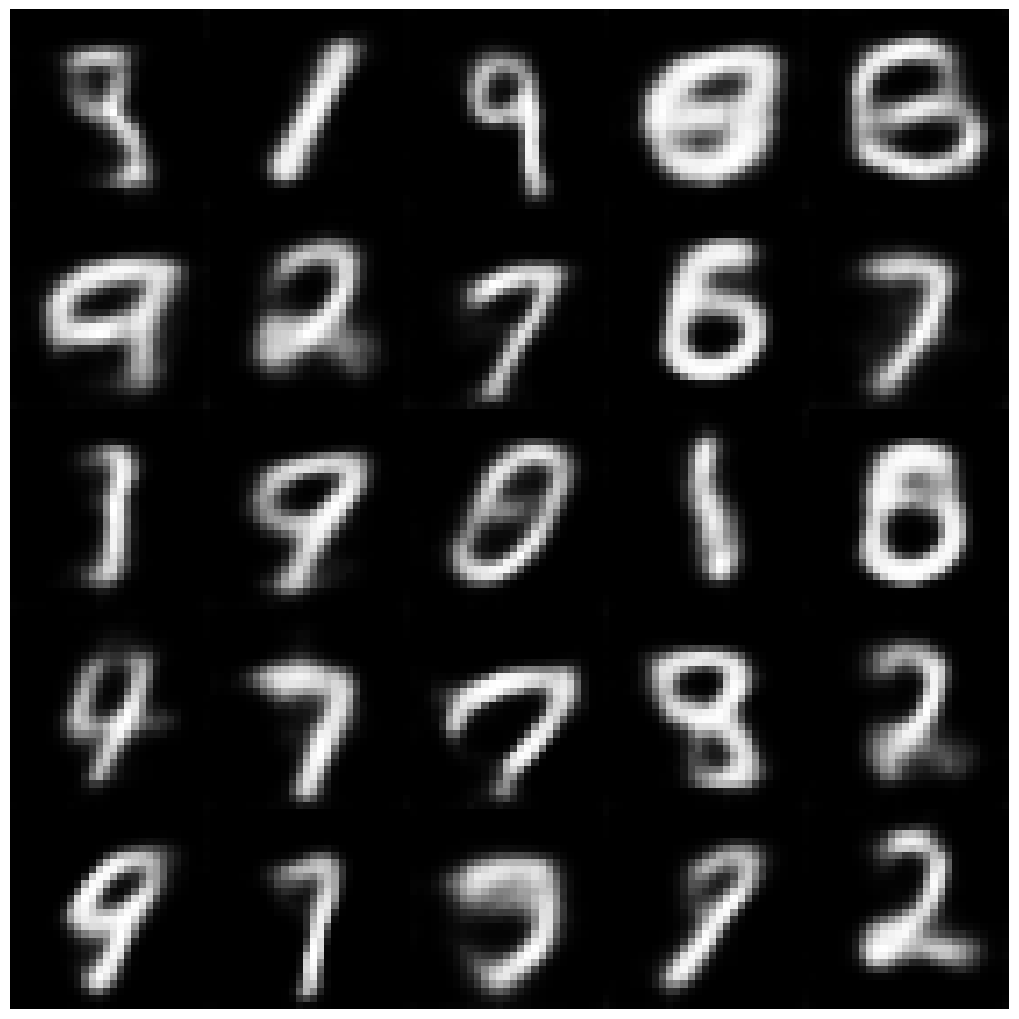

In [14]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [15]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

In [16]:
# set up GMM sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

In [17]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

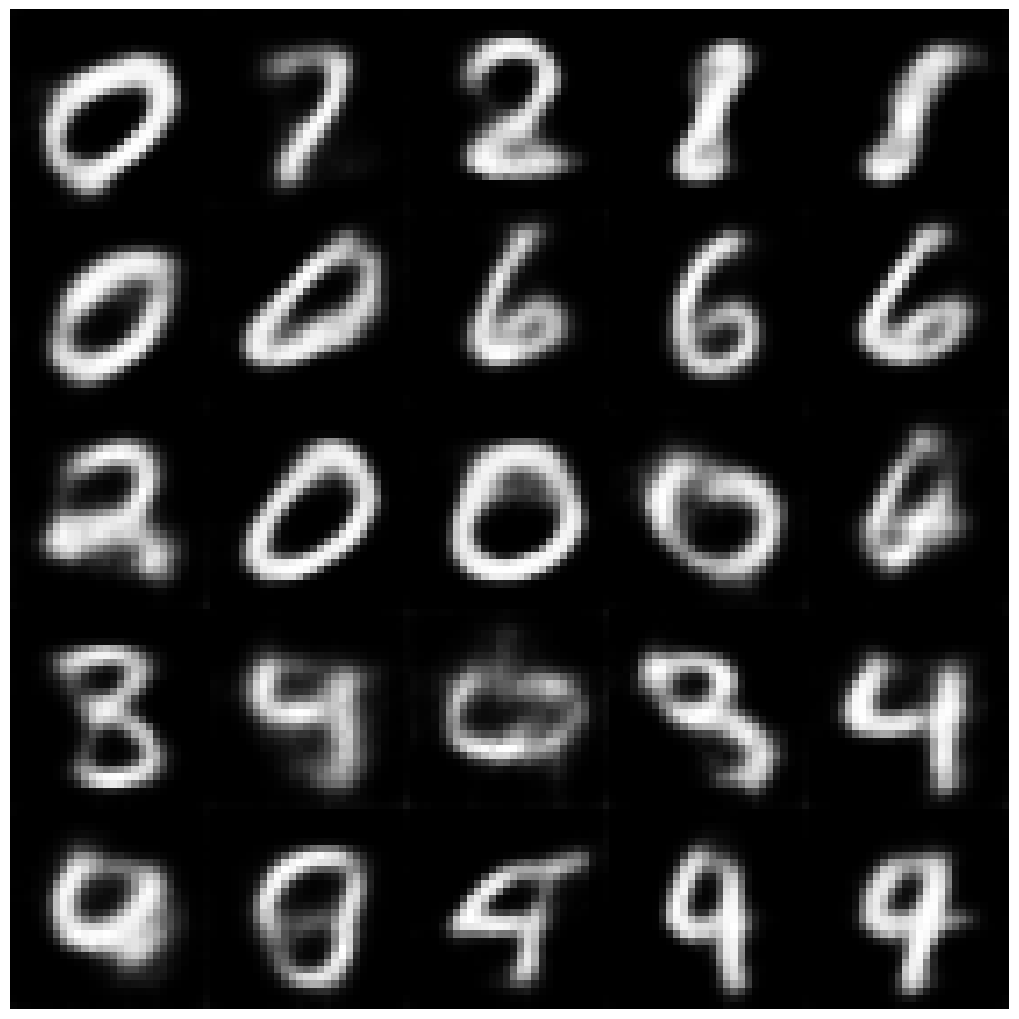

In [18]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [19]:
reconstructions = trained_model.reconstruct(eval_dataset[:25].to(device)).detach().cpu()

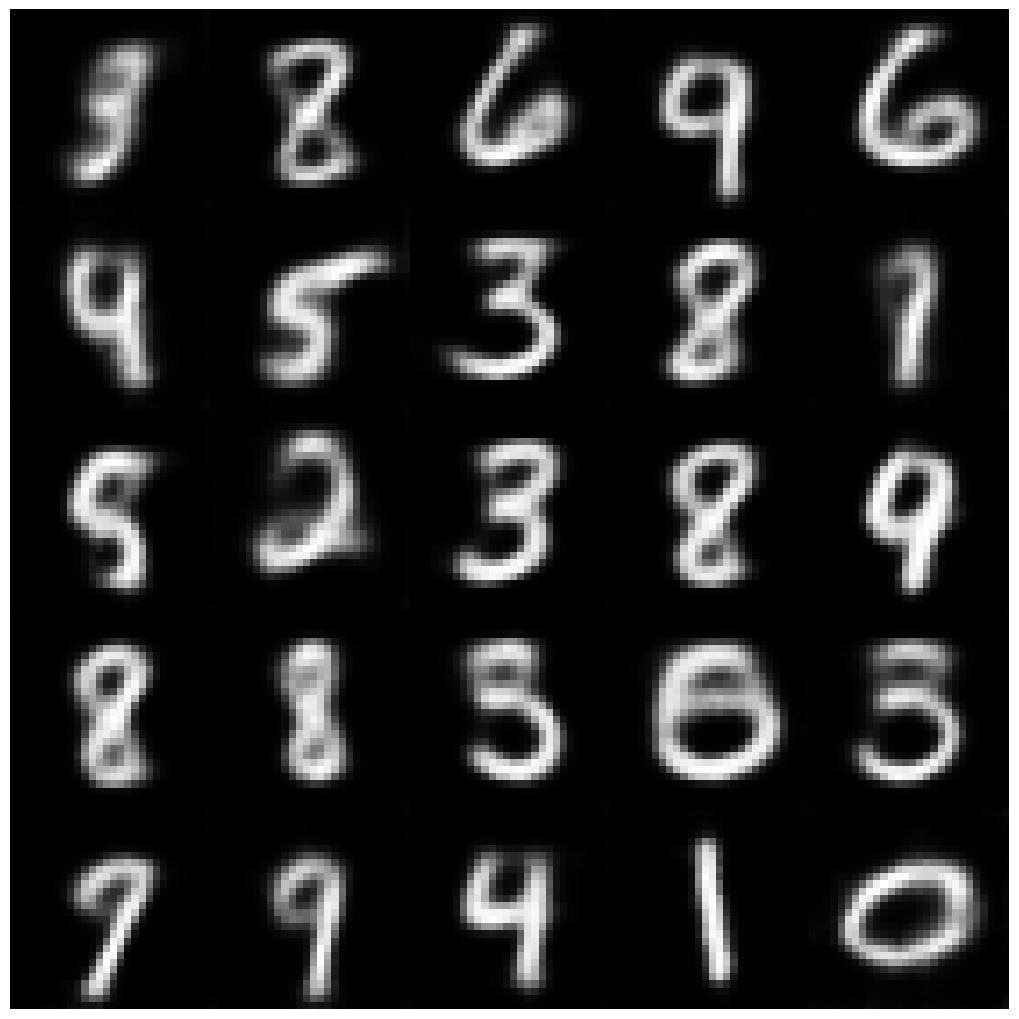

In [20]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

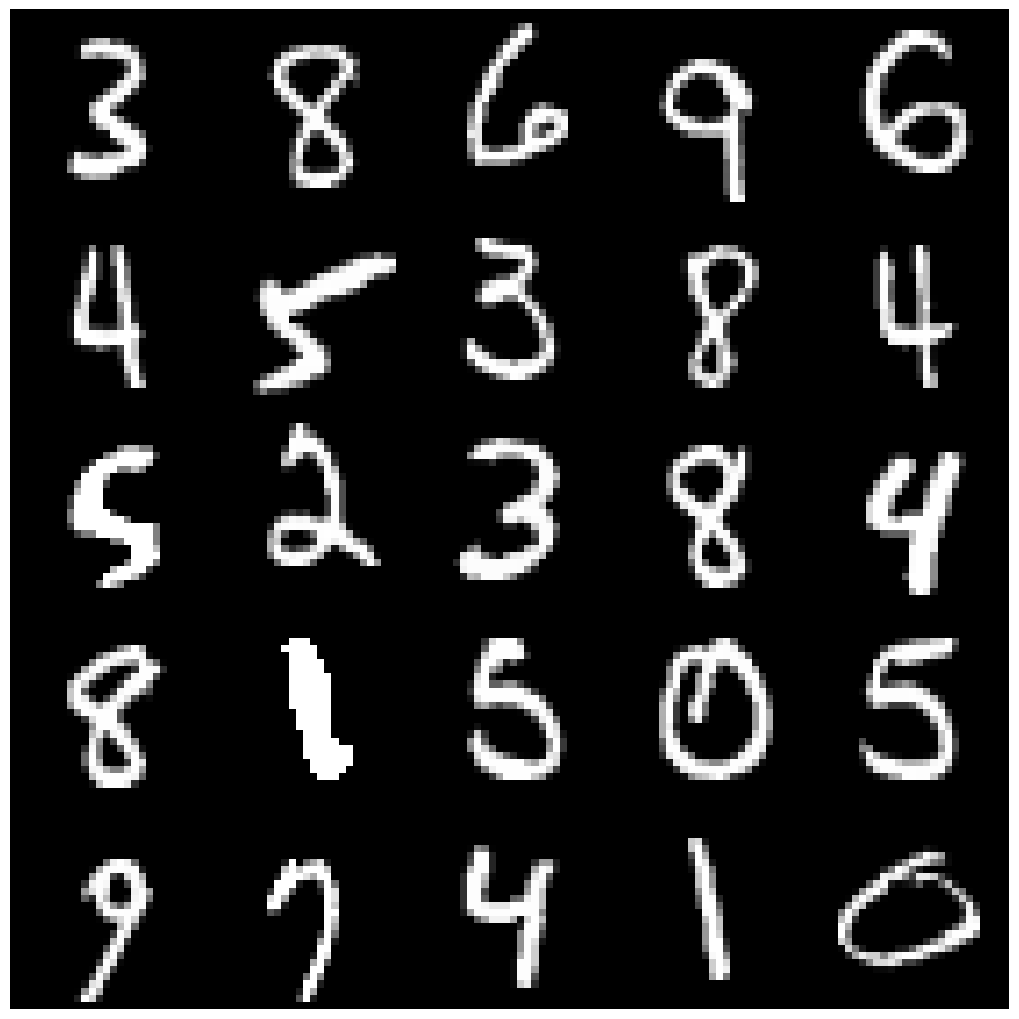

In [21]:
# show the true data
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [22]:
interpolations = trained_model.interpolate(eval_dataset[:5].to(device), eval_dataset[5:10].to(device), granularity=10).detach().cpu()

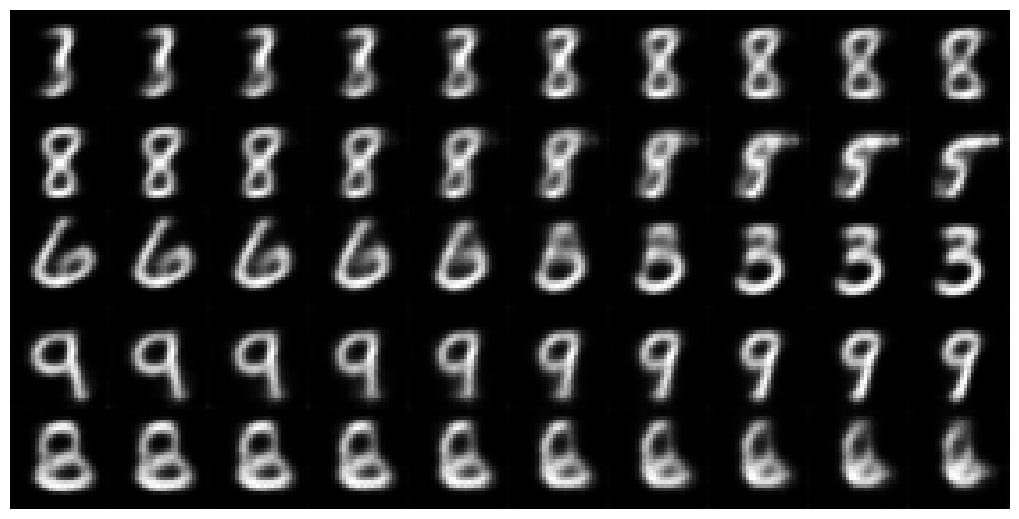

In [23]:
# show interpolations
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        axes[i][j].imshow(interpolations[i, j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)